# Respiration

268269-2431-MDC_RESP-62.5.csv:
sampling frequency is  1  Hz


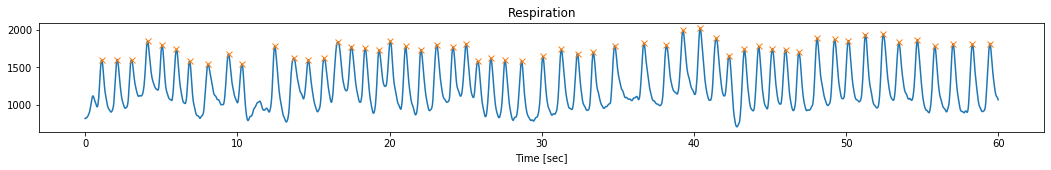

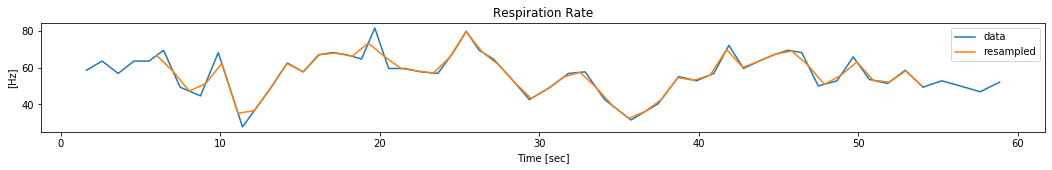

268269-2431-MDC_RESP-62.5.csv:
sampling frequency is  1  Hz


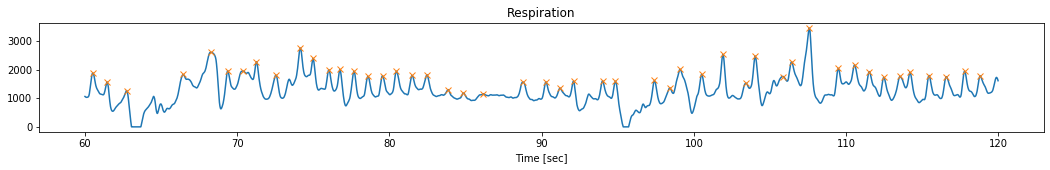

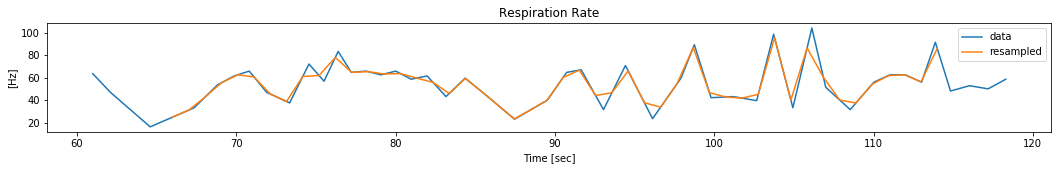

268269-2431-MDC_RESP-62.5.csv:
sampling frequency is  1  Hz


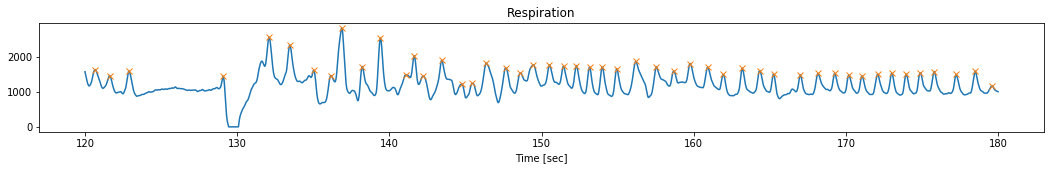

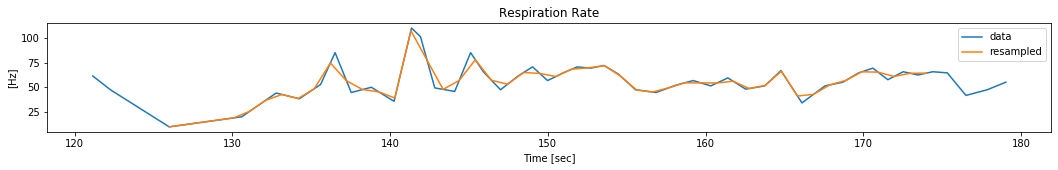

268269-2431-MDC_RESP-62.5.csv:
sampling frequency is  1  Hz


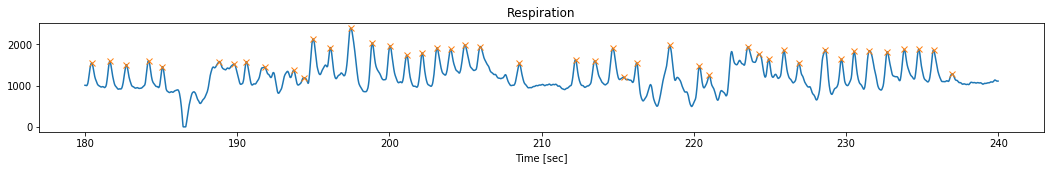

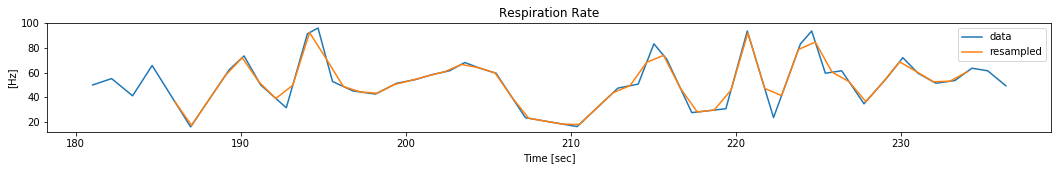

268269-2431-MDC_RESP-62.5.csv:
sampling frequency is  1  Hz


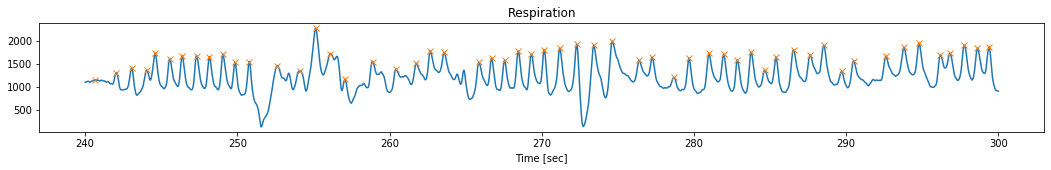

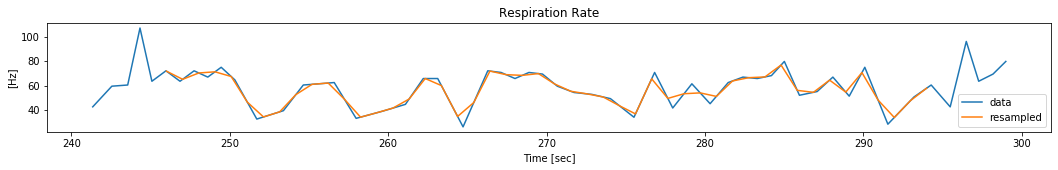

268269-2431-MDC_RESP-62.5.csv:
sampling frequency is  1  Hz


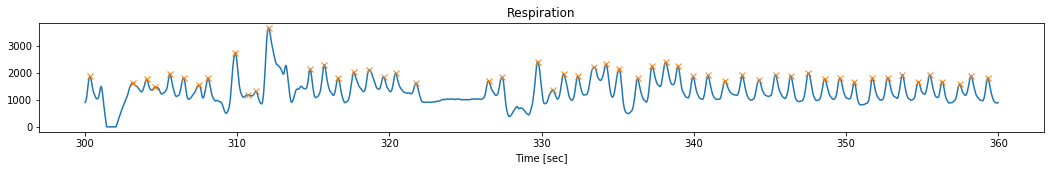

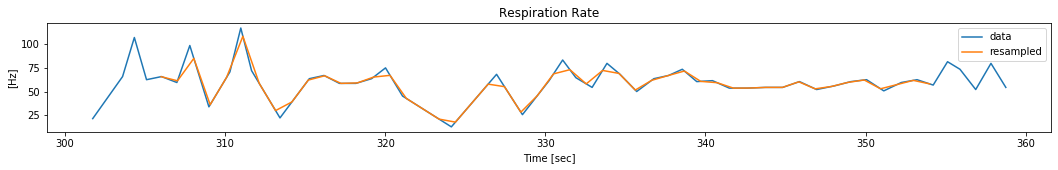

268269-2431-MDC_RESP-62.5.csv:
sampling frequency is  1  Hz


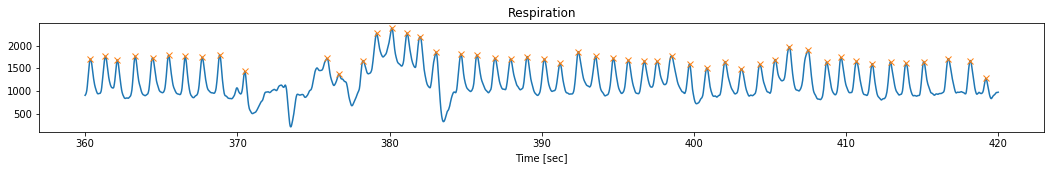

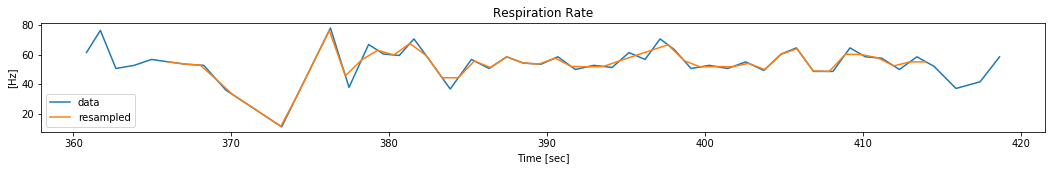

268269-2431-MDC_RESP-62.5.csv:
sampling frequency is  1  Hz


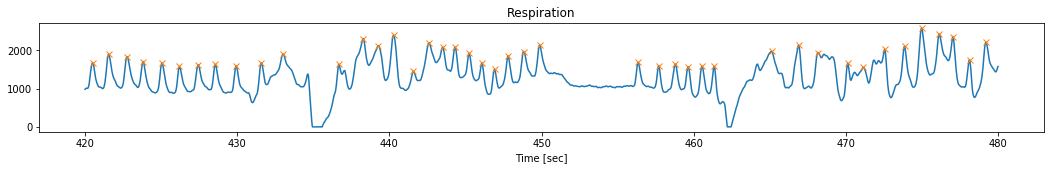

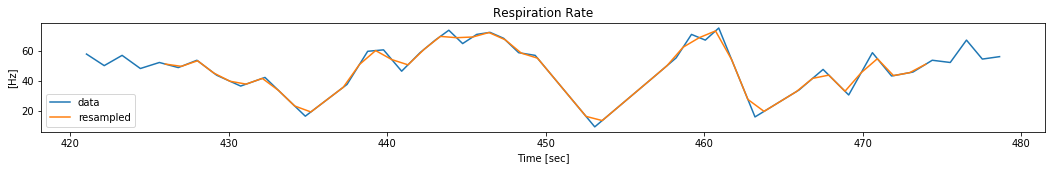

268269-2431-MDC_RESP-62.5.csv:
sampling frequency is  1  Hz


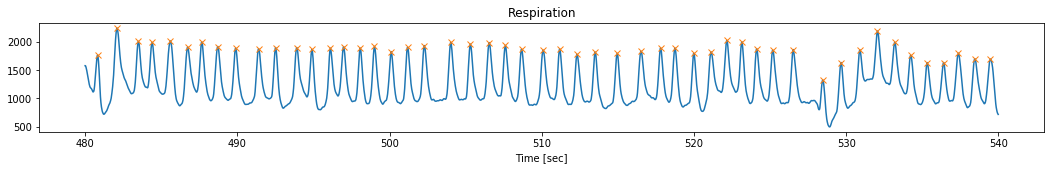

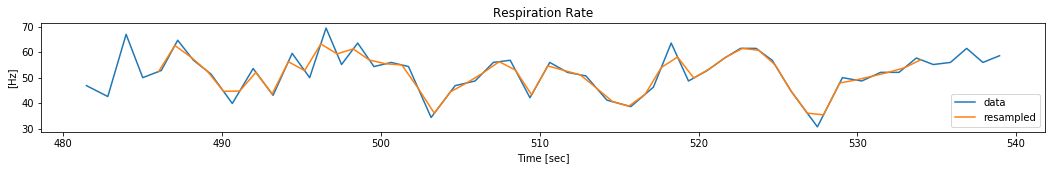

268269-2431-MDC_RESP-62.5.csv:
sampling frequency is  1  Hz


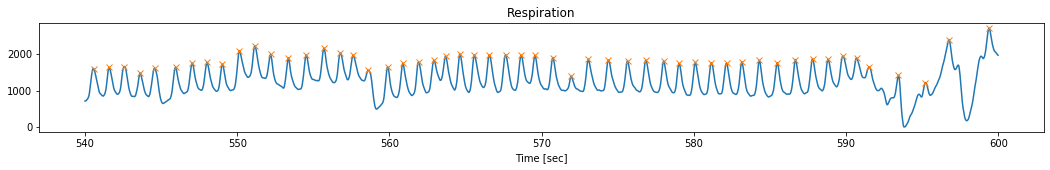

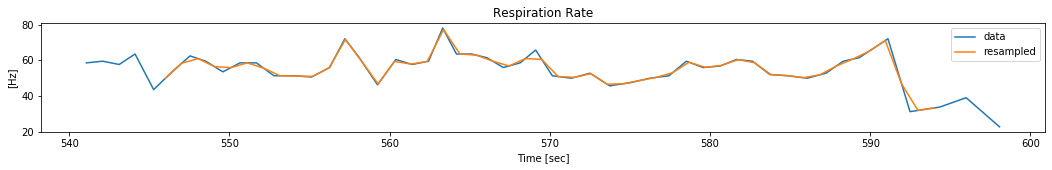

268269-2431-MDC_RESP-62.5.csv:
sampling frequency is  1  Hz


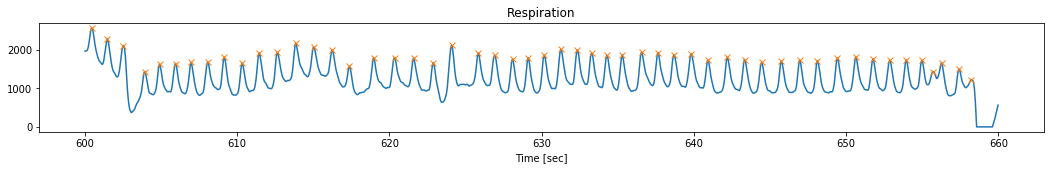

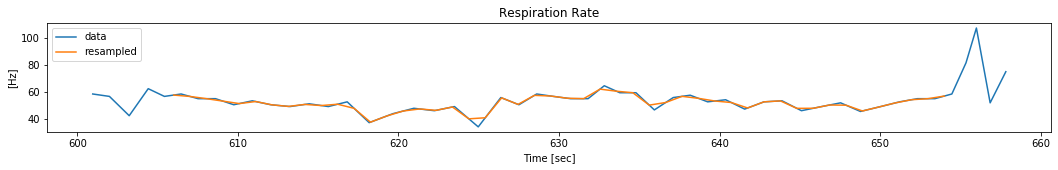

268269-2431-MDC_RESP-62.5.csv:
sampling frequency is  1  Hz


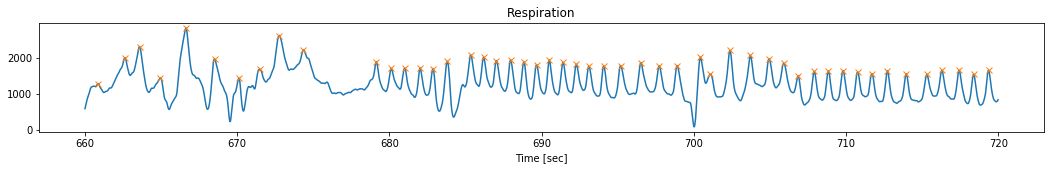

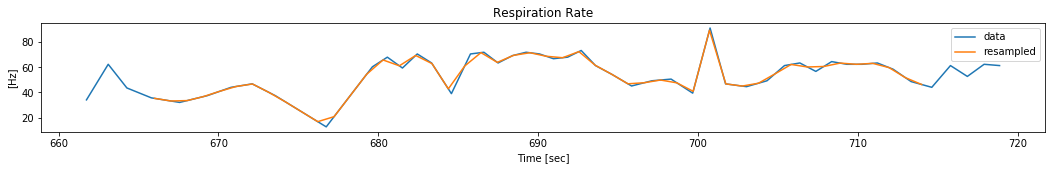

268269-2431-MDC_RESP-62.5.csv:
sampling frequency is  1  Hz


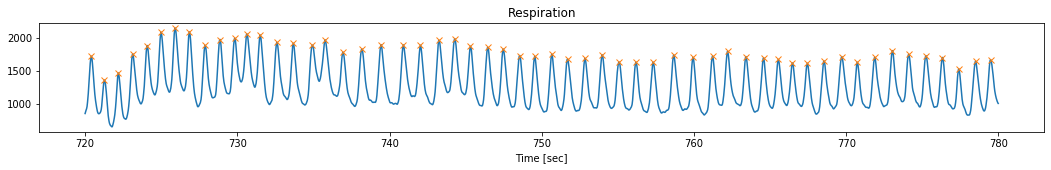

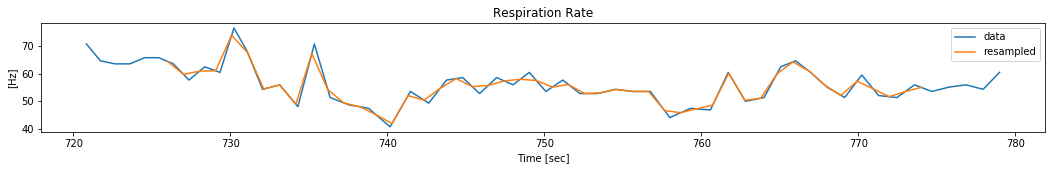

268269-2431-MDC_RESP-62.5.csv:
sampling frequency is  1  Hz


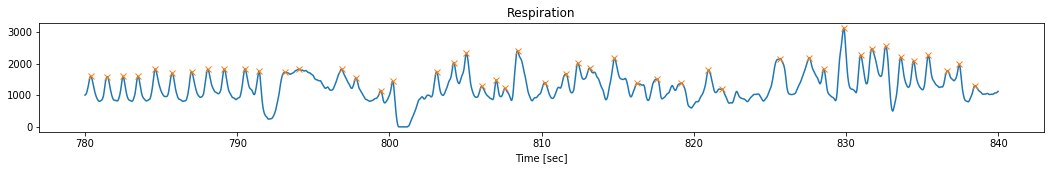

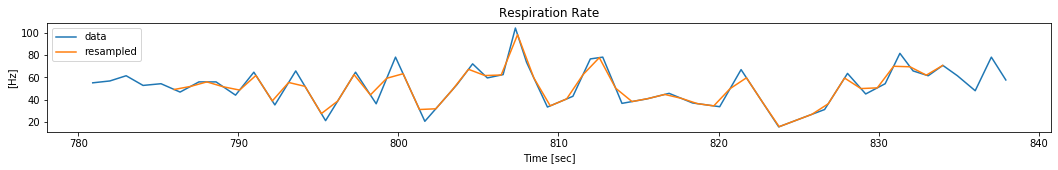

In [2]:
def rr(start, end, print1, print3):
    %run configuration.ipynb
    resp = []
    for filename in os.listdir('samples'):
        if "MDC_RESP-62.5" in filename:
            if print1 or print3:
                print(filename+':')
                print("sampling frequency is ", F," Hz")
            with open('samples/'+filename, 'r') as f:
                reader = csv.reader(f)
                for row in reader:
                    resp.append(float(row[1]))

                resp_small = np.array(resp[(int)(start*62.5):(int)(end*62.5)])            
                peaks,_=find_peaks(resp_small, distance=31, height=1150, width=12, prominence=1)
                peaks_sec = (peaks + start*62.5) * 0.016
                time = np.arange(start, end, 0.016)
                
                if print1:
                    plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                    plt.plot(time,resp_small)
                    plt.plot(peaks_sec, resp_small[peaks], "x")
                    plt.title('Respiration')
                    plt.xlabel('Time [sec]')
                    plt.show()

                diffs = np.diff(peaks_sec)
                peaks_sec = peaks_sec[:len(diffs)]+diffs/2
                rr = 60/diffs

                resp = []

                rr_interp_func = interp1d(peaks_sec, rr)
                time = np.linspace(start + MARGIN, end - MARGIN, F * (end - start - 2*MARGIN))

                if print3:
                    plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                    plt.plot(peaks_sec,rr)
                    plt.plot(time,rr_interp_func(time))
                    plt.title('Respiration Rate')
                    plt.xlabel('Time [sec]')
                    plt.ylabel('[Hz]')
                    plt.legend(['data', 'resampled'], loc='best')
                    plt.show()
                
                return time, rr_interp_func(time)
'''            
for i in range(14):
    rr(i*60, (1+i)*60, 1, 1)
'''
            